In [1]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import matplotlib
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
matplotlib.interactive(False)

     t-1  t+1
t-1  1.0  1.0
t+1  1.0  1.0


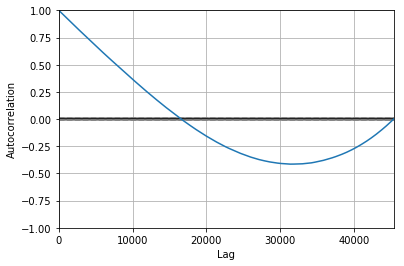

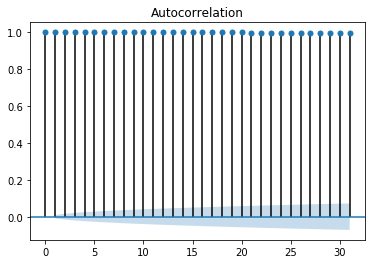

In [4]:
 
series = Series.from_csv('CRAC3.out.csv',header=0)
values = DataFrame(series.values)

dataframe = pd.concat([values.shift(1), values],axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

autocorrelation_plot(series)
pyplot.show()
pyplot.savefig('autocor.png')
plot_acf(series, lags=31)
pyplot.show()
pyplot.savefig('acf-lag31.png')

In [5]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import sys
import os

ratio = 0.67

csv_file = 'CRAC3.out.csv'
print ('file name %s train ratio %f'%(csv_file,ratio))
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size
#train, test = X[1:len(X)-1440], X[len(X)-1440:]
train,test =X[0:train_size,:], X[train_size:len(X),:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

file name CRAC3.out.csv train ratio 0.670000


Test MSE: 0.160
Test RMSE: 0.400


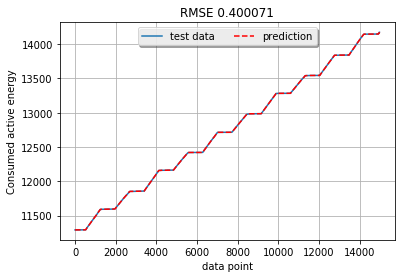

In [7]:
# persistence model
def model_persistence(x):
        return x

# walk-forward validation
predictions = list()
for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
test_score = sqrt(test_score)
print('Test RMSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title("RMSE %f"%(test_score))
pyplot.plot(test_y,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',   shadow=True, ncol=2)

pyplot.show()
pyplot.savefig('predict1.png')